### Import packages

In [1]:
from pathlib import Path 
import pandas as pd 
pd.set_option('display.max_columns', None)
import pickle 

import seaborn as sns 
import matplotlib.pyplot  as plt 

In [2]:
from sklearn.feature_extraction import DictVectorizer 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 

from sklearn.metrics import mean_squared_error

### Read data and manipulate it

In [3]:
home_path = Path.home() / 'Desktop/learning_space/ml_ops/mlops-zoomcamp'

print(home_path)

/Users/nguyenbuiminh/Desktop/learning_space/ml_ops/mlops-zoomcamp


In [4]:
df = pd.read_parquet(home_path / 'data/green_tripdata_2024-01.parquet')
df.sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
10723,2,2024-01-07 18:57:33,2024-01-07 19:07:50,N,1.0,74,140,1.0,2.90,14.2,0.0,0.5,3.69,0.0,NaN,1.0,22.14,1.0,1.0,2.75
39736,2,2024-01-24 14:05:02,2024-01-24 14:13:35,N,1.0,116,42,1.0,1.80,11.4,0.0,0.5,2.32,0.0,NaN,1.0,15.22,1.0,1.0,0.00
51246,2,2024-01-31 06:43:32,2024-01-31 06:47:51,N,1.0,75,141,1.0,1.64,8.6,0.0,0.5,0.00,0.0,NaN,1.0,12.85,2.0,1.0,2.75
25727,1,2024-01-16 16:52:06,2024-01-16 17:01:01,N,1.0,74,41,1.0,1.20,8.6,2.5,1.5,2.00,0.0,NaN,1.0,14.60,1.0,1.0,0.00
16579,2,2024-01-10 23:07:53,2024-01-10 23:27:48,N,1.0,7,48,5.0,4.80,24.0,1.0,0.5,0.00,0.0,NaN,1.0,29.25,2.0,1.0,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

In [6]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime 

df.duration = df.duration.apply(lambda val: val.total_seconds() * 1.0 / 60)
df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [7]:
train_dicts = df[categorical + numerical].to_dict(orient = 'records')

dv = DictVectorizer() 
X_train = dv.fit_transform(train_dicts) 

target = 'duration'
y_train = df[target].values 

lr = LinearRegression() 
lr.fit(X_train, y_train) 

y_pred = lr.predict(X_train) 

mean_squared_error(y_train, y_pred, squared = False)

7.126377724182349

/var/folders/zm/523nwn99621b8fq94ct_kjgh0000gn/T/ipykernel_9155/4107668193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'prediction')
/var/folders/zm/523nwn99621b8fq94ct_kjgh0000gn/T/ipykernel_9155/4107668193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, lab

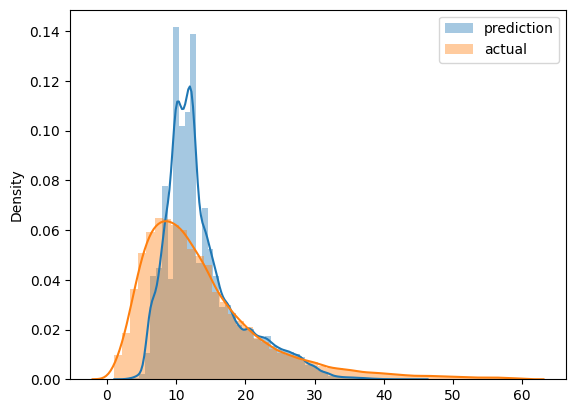

In [8]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()

In [9]:
train_dicts

[{'PULocationID': '236', 'DOLocationID': '239', 'trip_distance': 1.98},
 {'PULocationID': '65', 'DOLocationID': '170', 'trip_distance': 6.54},
 {'PULocationID': '74', 'DOLocationID': '262', 'trip_distance': 3.08},
 {'PULocationID': '74', 'DOLocationID': '116', 'trip_distance': 2.4},
 {'PULocationID': '74', 'DOLocationID': '243', 'trip_distance': 5.14},
 {'PULocationID': '33', 'DOLocationID': '209', 'trip_distance': 2.0},
 {'PULocationID': '74', 'DOLocationID': '238', 'trip_distance': 3.2},
 {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.01},
 {'PULocationID': '226', 'DOLocationID': '226', 'trip_distance': 0.31},
 {'PULocationID': '7', 'DOLocationID': '129', 'trip_distance': 2.32},
 {'PULocationID': '42', 'DOLocationID': '75', 'trip_distance': 2.69},
 {'PULocationID': '41', 'DOLocationID': '141', 'trip_distance': 3.73},
 {'PULocationID': '130', 'DOLocationID': '196', 'trip_distance': 5.06},
 {'PULocationID': '74', 'DOLocationID': '69', 'trip_distance': 2.93},
 {'PULoc

In [10]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df= pd.read_csv(filename) 
        
        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    
    elif filename.endswith('.parquet'): 
        df = pd.read_parquet(filename) 
    
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    
    df.duration = df.duration.apply(lambda x: x.total_seconds()/60)
    
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df 

In [11]:
df_train = read_dataframe(str(home_path / 'data/green_tripdata_2023-01.parquet'))
df_val = read_dataframe(str(home_path / 'data/green_tripdata_2024-01.parquet'))

In [12]:
len(df_train), len(df_val)

(65946, 54373)

In [13]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [14]:
categorical = ['PU_DO'] #PULocationID, DOLocationID
numerical = ['trip_distance']

dv = DictVectorizer() 

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)



In [15]:
target = 'duration'
y_train = df_train[target].values 
y_val = df_val[target].values 

In [16]:
lr = LinearRegression() 
lr.fit(X_train, y_train) 

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

6.062461694118086

In [17]:
home_path

PosixPath('/Users/nguyenbuiminh/Desktop/learning_space/ml_ops/mlops-zoomcamp')

In [18]:
import os 

os.makedirs(home_path / 'models', exist_ok=True)

In [19]:
with open(home_path / 'models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [20]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val) 

mean_squared_error(y_val, y_pred, squared=False)

7.968030568643374